In [1]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
spotify_df = pd.read_csv('cleaned_spotify_top_songs_audio_features.csv')
spotify_df.head()

,id,artist_names,track_name,duration,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),0 days 00:03:08.491000,RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,0 days 00:03:13.680000,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,0 days 00:03:42.973000,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),0 days 00:04:44.856000,Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),0 days 00:03:13.507000,Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,30,301860377


In [3]:
spotify_df.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,weeks_on_chart,streams
count,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6.509000e+03
mean,0.681628,0.636402,0.121963,0.236584,0.012473,0.180156,0.492196,-6.355208,122.105957,13.621447,1.090231e+08
std,0.141728,0.164786,0.113467,0.244684,0.075173,0.138054,0.226846,2.530230,29.418169,24.089981,2.277271e+08
min,0.150000,0.021800,0.023200,0.000008,0.000000,0.019700,0.032000,-34.475000,46.718000,1.000000,2.525159e+06
25%,0.591000,0.534000,0.044000,0.044300,0.000000,0.097400,0.316000,-7.564000,98.005000,1.000000,8.695060e+06
50%,0.698000,0.650000,0.072200,0.145000,0.000000,0.124000,0.489000,-5.984000,120.031000,4.000000,2.713364e+07
75%,0.785000,0.759000,0.163000,0.355000,0.000040,0.219000,0.668000,-4.673000,142.025000,16.000000,9.957265e+07
max,0.985000,0.989000,0.966000,0.994000,0.953000,0.977000,0.982000,-0.020000,212.117000,367.000000,3.528450e+09


## Data Analysis

### Top 10 artists from the data set based on collective streams

In [4]:
topartists = spotify_df.groupby('artist_names')['streams']
topartists_streams = topartists.sum().sort_values(ascending= False)[:10]

In [5]:
topartists_streams

artist_names
Taylor Swift      15388585740
Ed Sheeran        13111071610
The Weeknd        11184004532
Bad Bunny         10532229467
Harry Styles       9661158399
Billie Eilish      9633076229
Olivia Rodrigo     8885676876
Ariana Grande      8364532797
Drake              7604179081
Post Malone        7362247507
Name: streams, dtype: int64

/var/folders/km/20gfmy8d1z331xdcx38w1q8h0000gn/T/ipykernel_5054/1804091732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = topartists_streams.values, y = topartists_streams.index, palette= 'deep', legend = False)


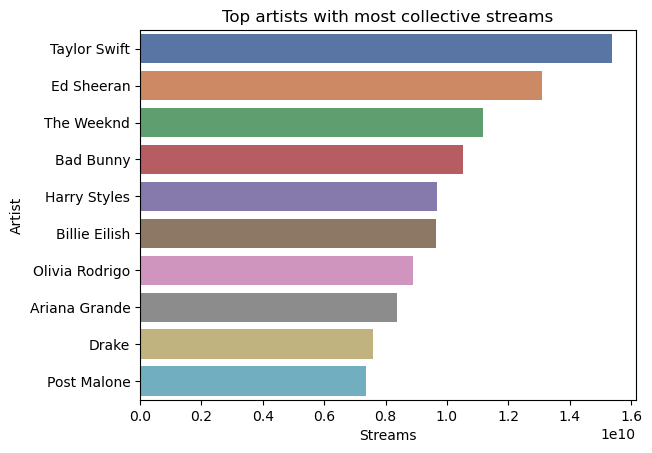

<Figure size 1100x700 with 0 Axes>

In [12]:
plt.title('Top artists with most collective streams')
plt.xlabel('Streams')
plt.ylabel('Artist')
sns.barplot(x = topartists_streams.values, y = topartists_streams.index, palette= 'deep')
plt.figure(figsize = (11,7))
plt.show();

### How are various audio features like danceability, energy, and valence distributed among the top 10 songs beased on weeks on chart?

In [8]:
topsongs = spotify_df.groupby(['artist_names','track_name','danceability','energy','valence'], as_index= False)['weeks_on_chart']
topsongs_weeks = topsongs.max().sort_values(by='weeks_on_chart',ascending= False)[:10]
topsongs_weeks[['danceability', 'energy', 'valence']].describe()

,danceability,energy,valence
count,10.000000,10.00000,10.000000
mean,0.639200,0.55090,0.495100
std,0.200024,0.16648,0.276426
min,0.351000,0.29600,0.120000
25%,0.504250,0.41575,0.358000
50%,0.677000,0.53950,0.441500
75%,0.812750,0.70900,0.623000
max,0.872000,0.78000,0.931000


#### General Statistics:

- **Danceability**: On average, the danceability score is 0.639, with a standard deviation of 0.200. This suggests a moderate to high tendency for tracks to be suitable for dancing. The relatively low standard deviation indicates that the top tracks have a somewhat consistent danceability factor.

- **Energy**: The average energy score is 0.551, indicating a slightly above medium level of intensity and activity. The standard deviation of 0.167 suggests that while most tracks are around this energy level, there is some variability.

- **Valence**: With an average valence score of 0.495, the tracks exhibit a balance between positive and negative emotions conveyed through the music. The higher standard deviation (0.277) compared to the other features indicates a broader range of emotional expression in these tracks.

#### Conclusions:

- **Diversity in Energy and Valence**: The top songs show diverse ranges in both energy and valence. This indicates that energy and valence are not necesserily important to decide how long a song stays on the chart.

- **Trend Towards Danceability**: With mean dancability leaning towards the higher end, it seems like higher dancability increases the chances of a song staying longer on the chart.

### Exploring the relation between the audio features mentioned above with the stream size of songs using a scatterplot

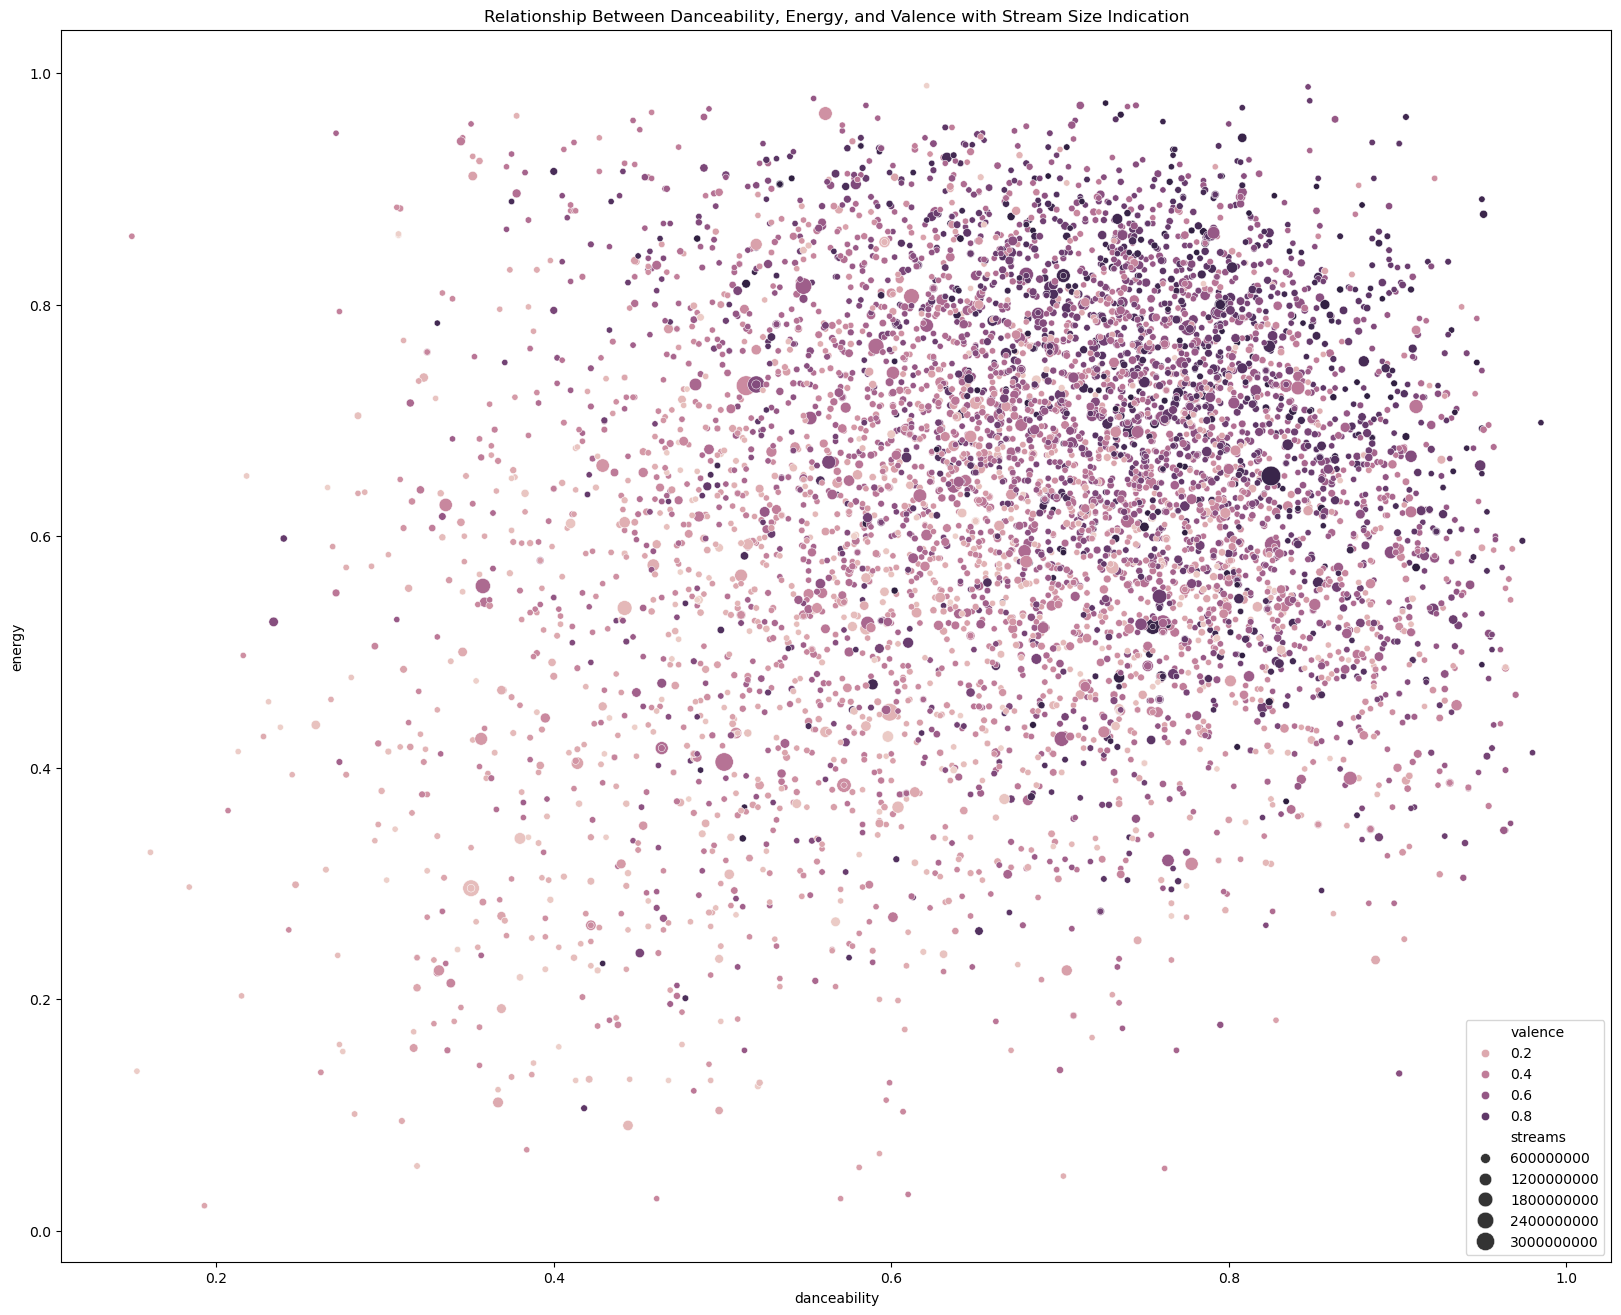

In [13]:
plt.figure(figsize=(20, 16))
sns.scatterplot(data=spotify_df, x='danceability', y='energy', hue='valence', size='streams', sizes=(20, 200))
plt.title('Relationship Between Danceability, Energy, and Valence with Stream Size Indication')
plt.show()

#### Analysis of Danceability, Energy, and Valence with Stream Size Indication

The scatter plot visualizes the relation between danceability, energy, and valence of tracks in the Spotify dataset, with the additional dimension of stream size to indicate popularity.

**Key Observations:**

- **Central Concentration**: The majority of tracks have moderate to high danceability and energy levels, which implies a huge number of upbeat and dynamic songs in the dataset.

- **Relationship Between Danceability and Energy**: While there isn't a clear linear correlation between danceability and energy, there is a noticeable trend where tracks with higher danceability often exhibit higher energy. 

- **Valence Distribution**: Valence, representing the musical positivity, shows a wide distribution across the plot. However, there's no apparent trend suggesting that either more positive or more negative tracks receive more streams.

- **Stream Size Diversity**: The diversity in the size of the plot points, which represent the number of streams, indicates that tracks across the entire spectrum of danceability and energy can achieve varying levels of popularity. However, there are a few tracks with significantly higher streams, potentially representing tracks by prominent artists.


## Impact of collaboration on the number of streams 

#### Adding a column 'collaboration' to the dataset with values 'True' or 'False' indicating if that song is collaborated with another artist or not

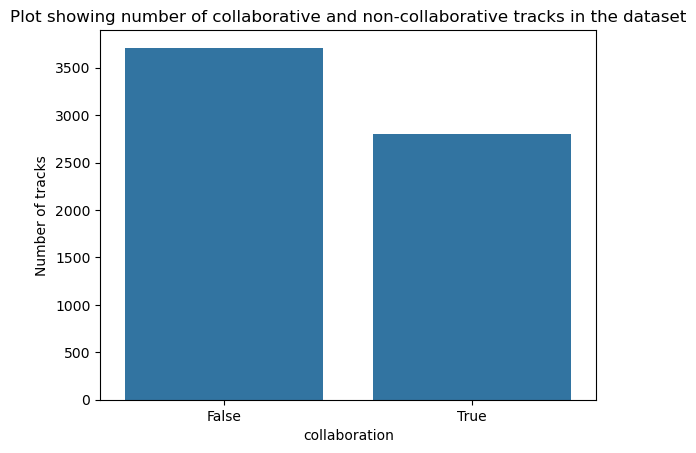

In [14]:
spotify_df['collaboration'] = spotify_df['artist_names'].str.contains('feat\.|,|with', regex = True)
collaboration_analysis = spotify_df.groupby('collaboration')['streams']
number = collaboration_analysis.size().reset_index()

sns.barplot(data = number, x = 'collaboration', y = 'streams')
plt.title('Plot showing number of collaborative and non-collaborative tracks in the dataset')
plt.xlabel('collaboration')
plt.ylabel('Number of tracks')
plt.show()

#### Plot showing relation between collaboration and the average streams for tracks in dataset

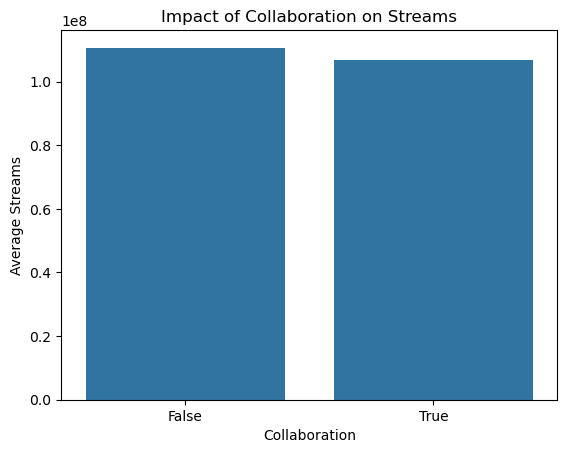

In [16]:
average_streams = collaboration_analysis.mean().reset_index()

sns.barplot(data= average_streams, x='collaboration', y='streams')
plt.title('Impact of Collaboration on Streams')
plt.xlabel('Collaboration')
plt.ylabel('Average Streams')
plt.show()

The bar chart illustrates the comparison of average stream counts between collaborative and non-collaborative tracks on Spotify. Each bar represents the mean number of streams for songs within each category, offering insight into whether collaborative efforts between artists significantly affect a song's popularity as measured by streams.

**Observations from the Bar Chart:**

- The average stream count for non-collaborative tracks (marked as `False`) is marginally higher than that for collaborative tracks (marked as `True`).
- While one might expect collaborations to attract more listeners due to the combined fan bases of the artists involved, the data indicates that non-collaborative tracks perform slightly better on average in terms of streams.
- The analysis on this matter can be skewed as we noticed before that the number of non-collaborative songs are higher than the collaborative songs. Need further analysis.


### Finding the correlation between various audio features and streams

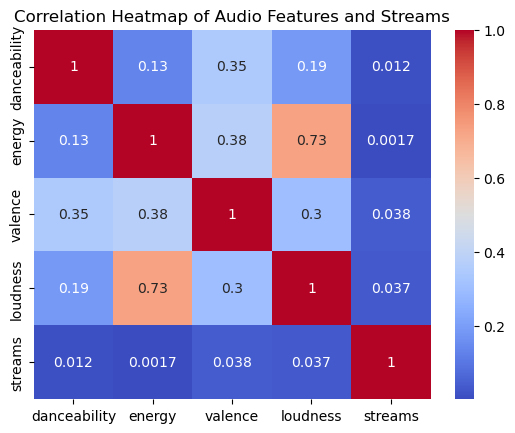

In [19]:
correlation = spotify_df[['danceability', 'energy', 'valence', 'loudness', 'streams']].corr()

sns.heatmap(data=correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Audio Features and Streams')
plt.show()

#### Insights from the Heatmap:
- **Danceability and Valence**: There is a moderate positive correlation (`0.35`) between danceability and valence, suggesting that more danceable tracks often have a happier or more positive tone.
- **Energy**: Energy shows a strong positive correlation with loudness (`0.73`), indicating that tracks with higher energy are often louder. Energy also has a moderate positive correlation with valence (`0.38`), which could imply that more energetic tracks tend to be perceived as more positive.
- **Streams**: The number of streams shows very low correlation coefficients with all audio features, suggesting that none of these features strongly predict the popularity of a track in terms of streams.